##### Prob 1.4
 - Window 사이즈를 변경해가면서 corner detect를 했다. 
 - Harris corner detector의 경우 scale invariance를 가지지 않기 때문에, 
    corner detect에 가장 적합한 window 사이즈가 있다. 
 - 이미지를 window 사이즈 3x3, 5x5, 7x7, 9x9로 늘려나가며 detect했을때의 결과는 다음과 같았다. 
 - window size가 커져감에 따라 대략적인 코너위치는 같지만 코너경계가 흐려지는 결과가 나왔다.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("done")

done


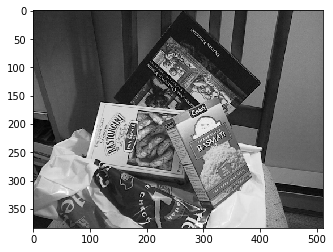

In [3]:
img = cv2.imread('scene.pgm',1)

row = img.shape[0]
col = img.shape[1]
filt_hor = np.array([[-1,1]])*.005
filt_ver = np.array([[-1],[1]])*.005
plt.imshow(img)

In [6]:
Ix = cv2.filter2D(img,-1,filt_hor)
Iy = cv2.filter2D(img,-1,filt_ver)
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix*Iy

C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


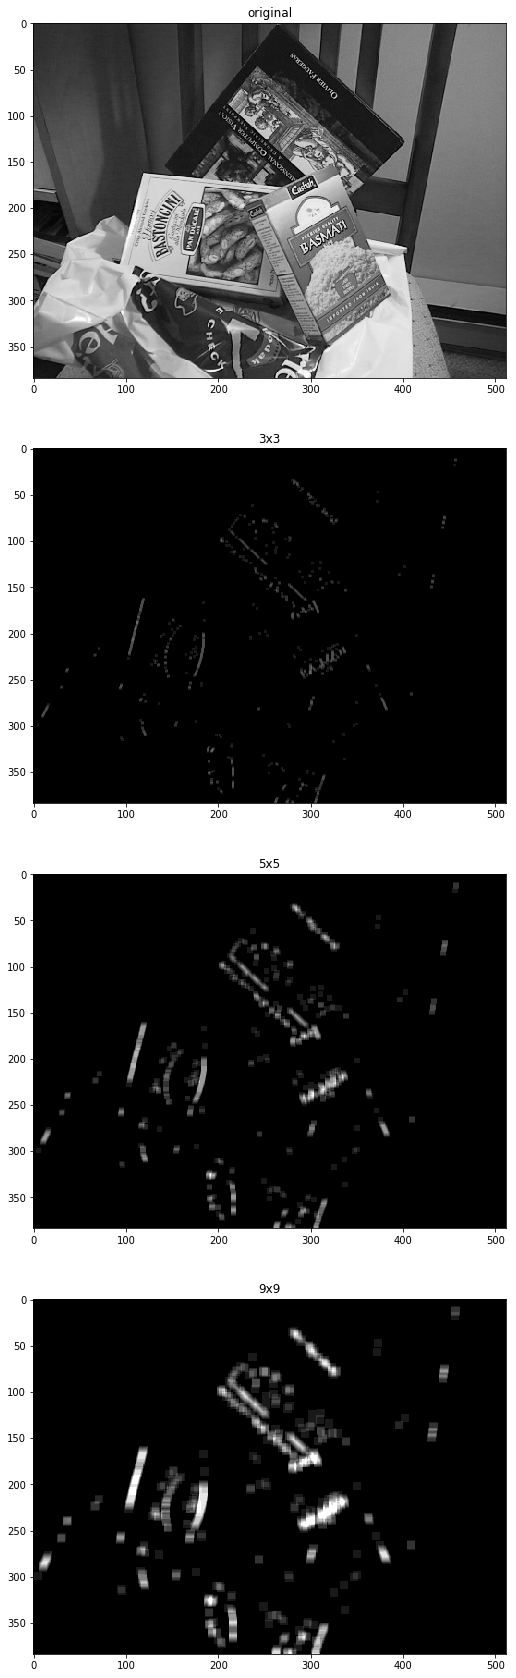

In [10]:
harmonics = []

for w in np.arange(3,10,3):
    win = np.ones((w,w))
    sum_Ix2 = cv2.filter2D(Ix2,-1,win)
    sum_Iy2 = cv2.filter2D(Iy2,-1,win)
    sum_Ixy = cv2.filter2D(Ixy,-1,win)
    # for harmonic mean img
    harmonic = np.zeros((row, col,3))
    for x in range(row):
        for y in range(col):
            h = np.zeros((2,2))
            h[0][0] = sum_Ix2[x][y][0]
            h[0][1] = sum_Ixy[x][y][0]
            h[1][0] = sum_Ixy[x][y][0]
            h[1][1] = sum_Ix2[x][y][0]
            r = np.linalg.det(h)/np.trace(h)
            for i in range(3):
                harmonic[x][y][i] = r*0.2
    harmonics.append(harmonic)
plt.figure(figsize=(50,30)) 
plt.subplot(4,1,1)
plt.title('original')
plt.imshow(img)
plt.subplot(4,1,2)
plt.title('3x3')
plt.imshow(harmonics[0])
plt.subplot(4,1,3)
plt.title('5x5')
plt.imshow(harmonics[1])
plt.subplot(4,1,4)
plt.title('9x9')
plt.imshow(harmonics[2])